# Cleaning all the data

In this notebook we will perform a first exploration of the initial data. The main goal is to understand what we've got to work with, and drop all the irrelevant data. The goal of this document is not to transform any data. At the end of the notebook, we will end up with a dataframe containing the main variables in order to perform data engineering on them in the second notebook named "Data Engineering". 

We are going to explore 3 CSV files found in "The Movies Database" project in Kaggle. There are other files in this Kaggle, but we wont be using them as they do not contain any further info that is relevant for this project. To take a look a the files, we have some extra notebooks stored in the file named "Extra Data" in our repository. 

## Loading libraries and data

In [2]:
import revesFunctions as rf  #We have created our own library. For more info, read revesFuncionts.py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [3]:
metadata = pd.read_csv("data/movies_metadata.zip", compression = "zip", low_memory = False)
credits = pd.read_csv("data/credits.zip", compression = "zip", low_memory = False)
keywords = pd.read_csv("data/keywords.zip",compression = "zip", low_memory = False)

In [4]:
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [6]:
keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


We are going to merge the dataframes on the "id" column, but first we should check that they belong to the same "data type". 
We are doing the merge before droping any row nor column because we don't have a huge amount of data. If we did, it would have been better to do a first and fast cleaning in order to optimize the merge. 

In [7]:
print(metadata["id"].dtype, credits["id"].dtype, keywords["id"].dtype)

object int64 int64


Before merge the data frames we need to tranform the id column of the df_metadata into int

In [8]:
metadata["id"] = pd.to_numeric(metadata["id"], errors = "coerce", downcast = "integer")

In [9]:
print(metadata["id"].dtype, credits["id"].dtype, keywords["id"].dtype)

float64 int64 int64


## Here comes the merge

In [10]:
initial_reves = reduce(lambda df_left, df_right: pd.merge(df_left, df_right, on = ["id"]), [metadata, credits, keywords])

In [11]:
initial_reves.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


## Diving into the Data

In [12]:
print(initial_reves.shape)
print(initial_reves.columns)

(46628, 27)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')


#### Features

* **adult**: Indicates if the movie is Adult/X-Rated or not.
* **belongs_to_collection**: A stringifield dictionary that gives information on the movie series the particular film belongs to. If the movie does not belong to any collection, the value is NaN.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringifield list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id**: The ID of the movie.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringifield list of production companies involved with the making of the movie.
* **production_countries**: A stringifield list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringifield list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.
* **cast**: A stringfield list of the cast of the movie.
* **crew**: A stringfield list of the crew of the movie.
* **keywords**: A stringfield list of keywords related to the movie.

In [13]:
initial_reves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 27 columns):
adult                    46628 non-null object
belongs_to_collection    4574 non-null object
budget                   46628 non-null object
genres                   46628 non-null object
homepage                 8009 non-null object
id                       46628 non-null float64
imdb_id                  46611 non-null object
original_language        46617 non-null object
original_title           46628 non-null object
overview                 45633 non-null object
popularity               46624 non-null object
poster_path              46229 non-null object
production_companies     46624 non-null object
production_countries     46624 non-null object
release_date             46540 non-null object
revenue                  46624 non-null float64
runtime                  46360 non-null float64
spoken_languages         46624 non-null object
status                   46542 non-null obje

In [14]:
initial_reves.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
cast                         0
crew                         0
keywords                     0
dtype: int64

Apparently, seems like there are no nulls. Let's also take a deeper look at each column to see it their type corresponds to what it should be. 

In [15]:
initial_reves[initial_reves.columns].dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
cast                      object
crew                      object
keywords                  object
dtype: object

* Budget should be numeric
* Belongs_to_collection, as it is expressed in the column name, should be bool.

## Initial Data Cleaning: Drop irrelevant info

### Missing revenue

First thing is first! The whole point to our model is being able to predict a movie revenue, so, this column is essential for this project. That's why the first thing we should do is find out how many movies do we have that actually have a registered value for the revenue. If this value is null, we will have to drop those rows.

As we found out in the previous cell, and also checked at metadata's stats, there are 4 null values in Revenue. Furthermore, we ought to check if we have values worth $0 revenue, because they'd be like null for us.

In [16]:
initial_reves["revenue"].describe()

count    4.662400e+04
mean     1.102765e+07
std      6.380526e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [17]:
initial_reves["revenue"].isnull().sum()

4

In [18]:
initial_reves[initial_reves["revenue"] > 0].shape

(7537, 27)

Out of 46628 movies, there are only 7537 rows with revenue metadata. We are going to change the dataframe containing only the movies with revenue information, since it's essencial for our model.

In [19]:
initial_reves = initial_reves[initial_reves["revenue"] > 0]

In [20]:
print(initial_reves.shape)
print(initial_reves.columns)

(7537, 27)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')


In [21]:
print(initial_reves["revenue"].describe())
print("-----")
print("There are %d null values in revenue column in this new dataframe" % (initial_reves["revenue"].isnull().sum()))

count    7.537000e+03
mean     6.821719e+07
std      1.458936e+08
min      1.000000e+00
25%      2.300000e+06
50%      1.662719e+07
75%      6.613263e+07
max      2.787965e+09
Name: revenue, dtype: float64
-----
There are 0 null values in revenue column in this new dataframe


Now let's check some random values. They seem like reasonable numbers for a movie revenue, don't they?

In [22]:
initial_reves["revenue"].sample(10)

2361       3000000.0
6516      12991996.0
24553     88761661.0
19239    161001698.0
1922     332000000.0
25393      1625847.0
23575     45967935.0
22014     15008161.0
586      272742922.0
19645     48126384.0
Name: revenue, dtype: float64

### Irrelevant columns

Before continue analyzing, we should take a quick glance at the "apparently irrelevant" columns to decide if we drop them. This is not big data, but it could help with processing time.

- Adult
- Homepage
- Status
- Original Title (won't affect the model)
- Overview
- Popularity
- Poster path (Not relevant)
- Tagline (Not relevant)
- Video (Not relevant)
- Vote_average
- Vote_count

#### Adult

In [23]:
initial_reves["adult"][initial_reves["revenue"] != 0].describe()

count      7537
unique        1
top       False
freq       7537
Name: adult, dtype: object

All the movies with revenue data are not Adult, this variable is not relevant.

#### Homepage

In [24]:
initial_reves["homepage"].head(3)

0    http://toystory.disney.com/toy-story
1                                     NaN
3                                     NaN
Name: homepage, dtype: object

In [25]:
initial_reves["homepage"] = initial_reves["homepage"].apply(lambda x: "yes" if x is not np.nan else "no")

In [26]:
initial_reves[initial_reves["revenue"] != 0].groupby("homepage")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
homepage,,,,,,,,
no,5127.0,4.279317e+07,7.923566e+07,1.0,1966723.00,12729917.0,4.435071e+07,8.766885e+08
yes,2410.0,1.223039e+08,2.211865e+08,1.0,3771742.75,35455217.0,1.322509e+08,2.787965e+09


#### Status

In [27]:
initial_reves[initial_reves["revenue"] != 0].groupby("status")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Post Production,5.0,7.159479e+06,9.860135e+06,90425.0,841733.00,1066471.0,10893246.00,2.290552e+07
Released,7524.0,6.832604e+07,1.459957e+08,1.0,2341010.25,16664814.5,66532939.00,2.787965e+09
Rumored,6.0,5.325868e+06,8.107588e+06,60.0,195025.00,251322.0,10131979.25,1.785071e+07


Most of the movies with revenue data are in Released status. This information is not relevant.

#### Overview

In [28]:
initial_reves["overview"].head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
3    Cheated on, mistreated and stepped on, the wom...
Name: overview, dtype: object

In [29]:
initial_reves["overview"][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

It could pretty cool to analyze Overview via NLP, but there's not enough info and not all movies have an overview

#### Popularity

In [30]:
initial_reves["popularity"].head(3)

0    21.946943
1    17.015539
3     3.859495
Name: popularity, dtype: object

We can't use this variable in our model because before a movie is released this information does not exist. Besides, we don't know how this value it is taken.

#### Poster Path

In [31]:
initial_reves["poster_path"].head(3)

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
Name: poster_path, dtype: object

#### Tagline

In [32]:
initial_reves["tagline"].head(3)

0                                                  NaN
1            Roll the dice and unleash the excitement!
3    Friends are the people who let you be yourself...
Name: tagline, dtype: object

#### Video

In [33]:
initial_reves["video"].sample(3)

10381    False
4446     False
12036    False
Name: video, dtype: object

#### Vote Average & Vote Count

In [34]:
initial_reves["vote_average"].head()

0    7.7
1    6.9
3    6.1
4    5.7
5    7.7
Name: vote_average, dtype: float64

In [35]:
initial_reves["vote_count"].head()

0    5415.0
1    2413.0
3      34.0
4     173.0
5    1886.0
Name: vote_count, dtype: float64

Vote average and vote count can't be use in the model because before a movie is released we don't know this information.

#### Dropping columns

In [36]:
cleaned_reves = initial_reves.drop(["adult" ,"id", "overview", "popularity" ,"poster_path", "tagline",  
              "status", "original_title", "video", "vote_average", "vote_count", "homepage" ], axis = 1).reset_index(drop = True)

In [37]:
cleaned_reves.head(3)

,belongs_to_collection,budget,genres,imdb_id,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,cast,crew,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."


### Relevant columns data exploration and cleaning

#### Belongs to Collection

In [38]:
cleaned_reves["belongs_to_collection"].head(10)

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2                                                  NaN
3    {'id': 96871, 'name': 'Father of the Bride Col...
4                                                  NaN
5                                                  NaN
6    {'id': 645, 'name': 'James Bond Collection', '...
7                                                  NaN
8    {'id': 117693, 'name': 'Balto Collection', 'po...
9                                                  NaN
Name: belongs_to_collection, dtype: object

In [39]:
print(cleaned_reves["belongs_to_collection"][0])
print("Type for dicts elements is %s" %(type(cleaned_reves["belongs_to_collection"][0])))

{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
Type for dicts elements is <class 'str'>


In [40]:
print(cleaned_reves["belongs_to_collection"][1])
print ("Type for NaN elements is %s" %(type(cleaned_reves["belongs_to_collection"][1])))

nan
Type for NaN elements is <class 'float'>


It seems that this column contains 2 different types of values:

* If, indeed, the movie belongs to a series or a collection, the row contains a dict with the Id and the Name of that collection.
* Otherwise, if the movie does not belong to a collection, the value is NaN.

For our model, the valuable information is to know whether a movie belongs to a collection or not, because our assumption is that if it does, the expected revenue could be higher.

At this point, we are taking only the name of the collection, and in the next notebook we will perform the data engineering and transform it into a number that represents the average gross per franchise.

First of all we have to transform this column into a dictionary, because is a string. For this task we build a function because we will use it later.

In [41]:
cleaned_reves = rf.to_dict(cleaned_reves, "belongs_to_collection")

In [42]:
cleaned_reves["belongs_to_collection"][0].keys()

dict_keys(['id', 'name', 'poster_path', 'backdrop_path'])

Now, we take the name of the collection

In [43]:
cleaned_reves["belongs_to_collection"] = cleaned_reves["belongs_to_collection"].apply(lambda x: x["name"] if x is not np.nan else x)

In [44]:
cleaned_reves["belongs_to_collection"].head(5)

0              Toy Story Collection
1                               NaN
2                               NaN
3    Father of the Bride Collection
4                               NaN
Name: belongs_to_collection, dtype: object

These are the highest grossing collections

In [45]:
cleaned_reves.groupby("belongs_to_collection")["revenue"].agg(["count", "sum", "mean"]).sort_values(by = "mean", ascending = False).reset_index()[:10]

,belongs_to_collection,count,sum,mean
0,Avatar Collection,1,2.787965e+09,2.787965e+09
1,The Avengers Collection,2,2.924962e+09,1.462481e+09
2,Frozen Collection,1,1.274219e+09,1.274219e+09
3,Finding Nemo Collection,2,1.968906e+09,9.844532e+08
4,The Hobbit Collection,3,2.935523e+09,9.785078e+08
5,The Lord of the Rings Collection,3,2.916545e+09,9.721816e+08
6,Harry Potter Collection,8,7.707367e+09,9.634209e+08
7,Star Wars Collection,8,7.434495e+09,9.293118e+08
8,Despicable Me Collection,4,3.691070e+09,9.227676e+08
9,Pirates of the Caribbean Collection,5,4.521577e+09,9.043154e+08


Taking into account the average gross

In [46]:
cleaned_reves.groupby("belongs_to_collection")["revenue"].agg(["count", "sum", "mean"]).sort_values(by = "sum", ascending = False).reset_index()[:10]

,belongs_to_collection,count,sum,mean
0,Harry Potter Collection,8,7.707367e+09,9.634209e+08
1,Star Wars Collection,8,7.434495e+09,9.293118e+08
2,James Bond Collection,26,7.106970e+09,2.733450e+08
3,The Fast and the Furious Collection,8,5.125099e+09,6.406373e+08
4,Pirates of the Caribbean Collection,5,4.521577e+09,9.043154e+08
5,Transformers Collection,5,4.366101e+09,8.732202e+08
6,Despicable Me Collection,4,3.691070e+09,9.227676e+08
7,The Twilight Collection,5,3.342107e+09,6.684215e+08
8,Ice Age Collection,5,3.216709e+09,6.433417e+08
9,Jurassic Park Collection,4,3.031484e+09,7.578710e+08


That the film belongs to a franchise is related to the revenue?

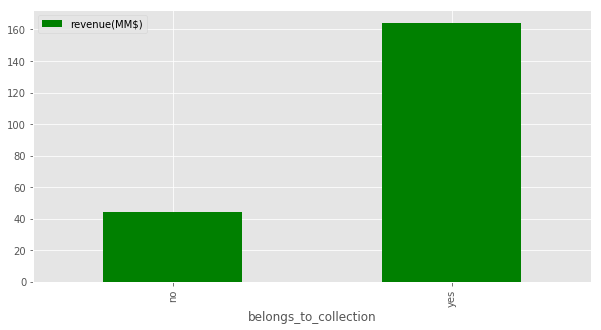

In [46]:
pd.DataFrame(
    {"revenue(MM$)": cleaned_reves["revenue"] / 1e6, 
     "belongs_to_collection": cleaned_reves["belongs_to_collection"].apply(lambda x: "yes" if x is not np.nan else "no")}
).groupby("belongs_to_collection").mean().plot.bar(figsize = (10, 5),color="green");

The films that belong to a franchise have more average revenue than the others.

#### Budget

First, we transform this column into numeric value

In [47]:
cleaned_reves["budget"] = pd.to_numeric(cleaned_reves["budget"], errors = "coerce")

In [48]:
cleaned_reves["budget"].dtype

dtype('int64')

In [49]:
cleaned_reves["budget"].describe()

count    7.537000e+03
mean     2.243523e+07
std      3.677674e+07
min      0.000000e+00
25%      0.000000e+00
50%      7.500000e+06
75%      2.800000e+07
max      3.800000e+08
Name: budget, dtype: float64

Now we have to analyze, out of the 7537, how many movies contain budget information in order to determine if we can use this variable in our model. As it happened with "Revenue" seems like we have not nulls, but we have false positives, since a 0 budget is null for us and a perfectly "not null" value for Python. This column should be numeric and $0 budget should be Nan.

In [50]:
cleaned_reves["budget"] = cleaned_reves["budget"].replace(0, np.nan)

In [51]:
cleaned_reves["budget"].notnull().sum()

5458

Out of 7537 movies, 5458 have a valid value for budget. Is that enough data for our model? Also, taking a deeper look at the values, seems that most of them are exact and round amounts, and they don't seem very accurate. Should we use this data in our model?

Let's plot a relation between budget and revenue

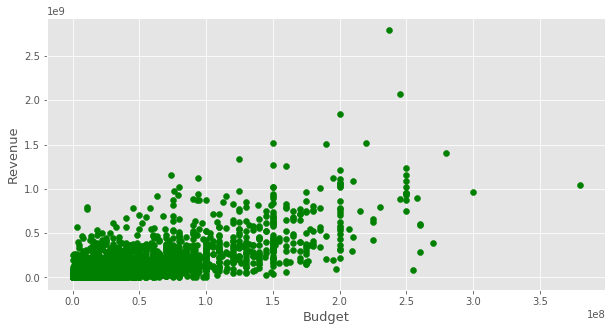

In [52]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = cleaned_reves["budget"], y = cleaned_reves["revenue"],color="green")

plt.ylabel("Revenue", fontsize = 13)
plt.xlabel("Budget", fontsize = 13)

plt.show()

We can see that there's a relationship between these two variables as expected. Unfortunately, taking a deeper look at the values, seems that most of them are exact and round amounts, and they don't seem very accurate.

Unlike revenue, in budget we don't know the year of production, so we can't be sure of how to introduce this data in our model since we can't apply any method to fix the inflation and stablish the price of money. Also, we do not know the criteria used to set budget values. Thus can't be sure whether this values are realiable.

So, even though data is highly relevant for revenue prediction, in this project we won't use budget as a feature. When Reve's becomes a real product, datamining is performed and we have better quality data, we can always put it back in game and use it to rise Reve's efficiency. For now, we'll hope that Reve's will be able to learn from this factor using "related" features such as Production company (bigger company's might invest more money) or Number of characters (more characters will probably mean more higher budget).

In [53]:
cleaned_reves.drop("budget", axis = 1, inplace = True)

#### Genres

In [54]:
cleaned_reves["genres"].sample(5)

7315    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
5448    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
1930    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
2800    [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...
898     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [55]:
print(cleaned_reves["genres"][0])
print(cleaned_reves["genres"][1])
print(cleaned_reves["genres"][235])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


Seems that in this column, we can find a list of dicts that indicate the different movie genres associated to each movie. As we can see, there are many different generes associated to each movie, but not always the same ammount of them. 

Basic questions we should ask ourselves about the column "Genres":

- How many genres are there? 
- Should we create dummie variables with all the genres?
- What's the maxium numbers of genres per movie we want to use in our model?
- ...

First, let's find out how many different genres we have got, and what's the maximum number of genres any of the movies has.

For this task we have created a function that transforms the column into a list, since we'll use it later for other columns.

This function takes the values of the key that are in the dictionary. For example, if we want the name of the genre we need to assign key = "name" in the input of the function.

In [56]:
cleaned_reves["genres"] = rf.to_list(cleaned_reves["genres"], "name")

In [57]:
cleaned_reves["genres"].head()

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2            [Comedy, Drama, Romance]
3                            [Comedy]
4    [Action, Crime, Drama, Thriller]
Name: genres, dtype: object

* Maximum genres in a movie?
* Mean of genres per movie?

In [58]:
stats.describe(np.array(cleaned_reves["genres"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 8), mean=2.5011277696696297, variance=1.2625053627863332, skewness=0.48130236924329367, kurtosis=-0.04560935460086002)

Results from the stats:

- We have movies with no genres
- 8 maximum genres per movie
- Mean of 2.5 genres per movie 

Does the number of genres in a movie affects to the revenue?

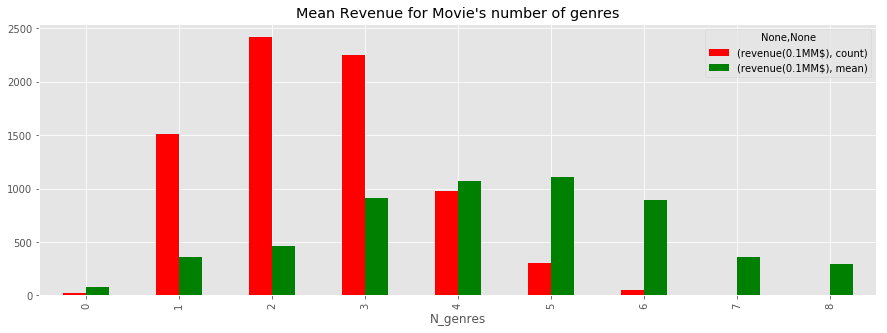

In [59]:
pd.DataFrame(
    {"revenue(0.1MM$)": cleaned_reves["revenue"]/1e5,
     "N_genres": [len(x) for x in cleaned_reves["genres"]]}
).groupby("N_genres").agg(["count", "mean"]).plot.bar(figsize = (15, 5),color=["red","green"])
plt.title("Mean Revenue for Movie's number of genres");

We see that most of the films have between 1 and 3 genres and it can be seen that the average of the collection increases with the number of genres up to 4-5.

Let's see how many genres we've got just in case we want to create dummie columns for each of them. For this task we will create a function that returns the list of genres and it's frequency. For the word count we will use the library collections.

In [60]:
genres_counter = rf.word_count(cleaned_reves, "genres")

In [61]:
print("We have %d unique genres" %(len(genres_counter.keys())))

We have 20 unique genres


Let's see the most common genres in a bar plot

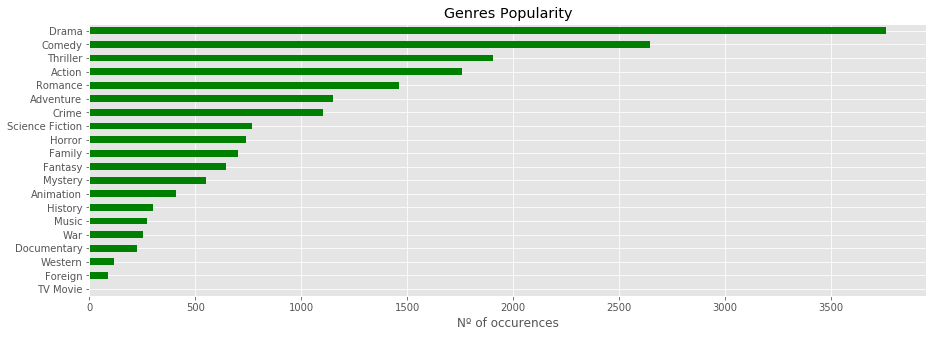

In [62]:
plt.subplots(figsize = (15, 5))

ax = pd.Series(genres_counter).sort_values(ascending = True).plot.barh(color = "green")
ax.set_xlabel("Nº of occurences")
ax.set_title("Genres Popularity") 

plt.show()

**<font color='red'>
    Aquí lo que he puesto es un gráfico que muestra el revenue medio por género. Para ello he creado la función word_mean que toma como inputs el dataframe, la columna de la cual se quiere hacer la media y luego la variable que se toma para hacer el cálculo de la media (revenue, budget, etc...).
    Al final esta función es la que más se utiliza para luego tranformar todas las variables en números en el segundo Notebook
</font>**

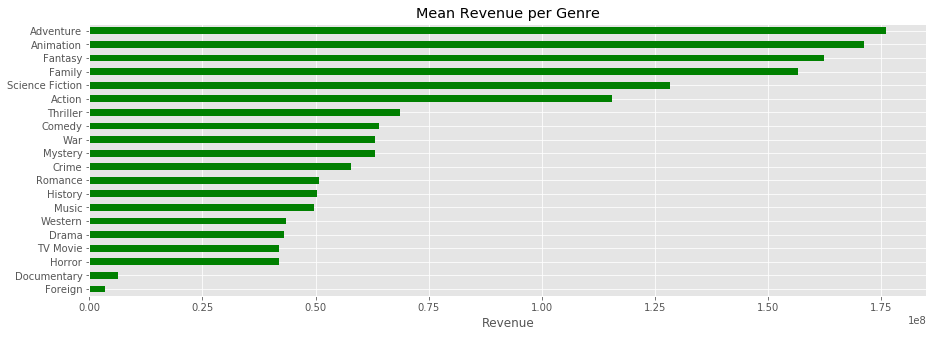

In [63]:
genres_dict = rf.word_mean(cleaned_reves, "genres", "revenue")

plt.subplots(figsize = (15, 5))

ax = pd.Series(genres_dict).sort_values(ascending = True).plot.barh(color = "green")
ax.set_xlabel("Revenue")
ax.set_title("Mean Revenue per Genre") 

plt.show()

Movies with no genres?

In [64]:
(cleaned_reves["genres"].str.len() == 0).sum()

23

#### Original Language

In [65]:
cleaned_reves["original_language"].head(5)

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [66]:
cleaned_reves["original_language"].describe()

count     7537
unique      44
top         en
freq      6428
Name: original_language, dtype: object

Let's see the frequency of the languages and if they are related to the revenue.

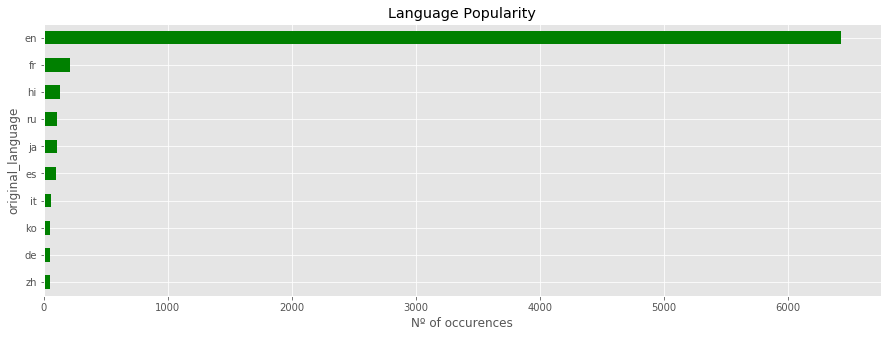

In [67]:
plt.subplots(figsize = (15, 5))

ax = cleaned_reves.groupby("original_language")["revenue"].count().sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Nº of occurences")
ax.set_title("Language Popularity") 

plt.show()

Most of the films are English so we could do a bar plot in which we see the average collection if the film is English or not.

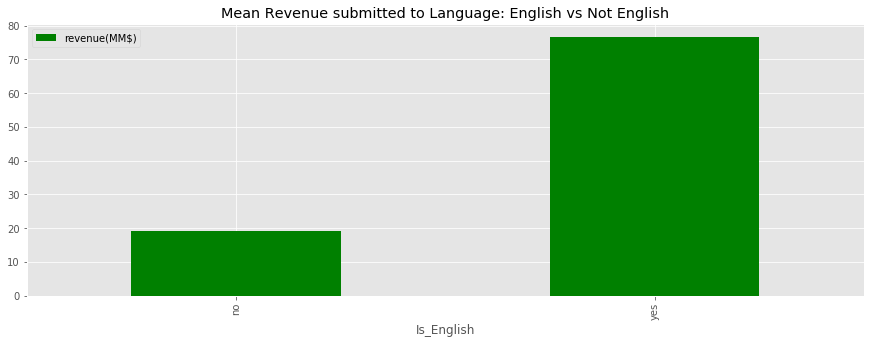

In [68]:
pd.DataFrame(
    {"revenue(MM$)": cleaned_reves["revenue"] / 1e6, 
     "Is_English": cleaned_reves["original_language"].apply(lambda x: "yes" if x == "en" else "no")}
).groupby("Is_English").mean().plot.bar(figsize = (15, 5),color="green");
plt.title("Mean Revenue submitted to Language: English vs Not English");

We see that English films are the most frequent and that they have also more average revenue. This leads us to think that we could categorize the films in two groups: English speaking and not.

Are there movies with no data in original language?

In [69]:
cleaned_reves["original_language"].isnull().sum()

0

#### Production Companies

In [70]:
cleaned_reves["production_companies"].head(5)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Twentieth Century Fox Film Corporat...
3    [{'name': 'Sandollar Productions', 'id': 5842}...
4    [{'name': 'Regency Enterprises', 'id': 508}, {...
Name: production_companies, dtype: object

Same as it happened with genres. Contains a list of dicts that we have to transform in a lists.

In [71]:
cleaned_reves["production_companies"] = rf.to_list(cleaned_reves["production_companies"], "name")

In [72]:
cleaned_reves["production_companies"].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2             [Twentieth Century Fox Film Corporation]
3         [Sandollar Productions, Touchstone Pictures]
4    [Regency Enterprises, Forward Pass, Warner Bros.]
Name: production_companies, dtype: object

In [73]:
stats.describe(np.array(cleaned_reves["production_companies"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 26), mean=2.7556056786519836, variance=4.7964206024518257, skewness=2.2842969003470928, kurtosis=10.71322621111153)

Results from the stats:

- We have movies with no production company
- 26 maximum genres per movie
- Mean of 2.75 production companies per movie 

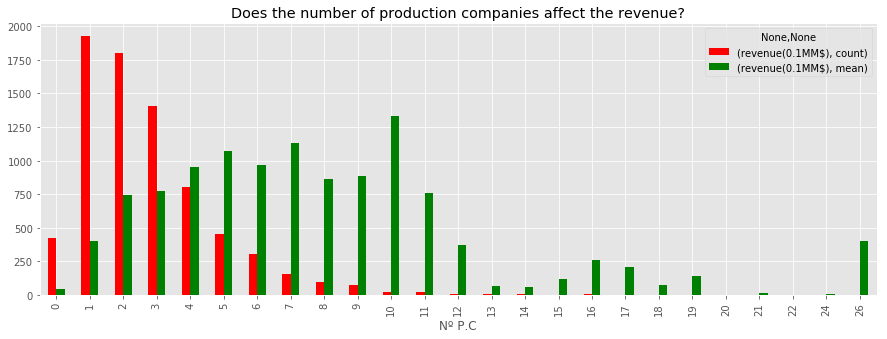

In [74]:
pd.DataFrame(
    {"revenue(0.1MM$)": cleaned_reves["revenue"] / 1e5,
     "Nº P.C": [len(x) for x in cleaned_reves["production_companies"]]}
).groupby("Nº P.C").agg(["count", "mean"]).plot.bar(figsize = (15, 5), color = ["red", "green"]);
plt.title("Does the number of production companies affect the revenue?");

Most of the films have between 1 and 7 production companies, and it can be seen that those that are between 4 and 7 usually have more average revenue. Maybe we should use "number of production companies" as factor in our model.

Let's see how many production companies we've got just in case we want to create dummie columns for each of them. Same function as above with genres.

In [75]:
production_companies_counter = rf.word_count(cleaned_reves, "production_companies")

In [76]:
production_companies_counter.most_common(5)

[('Warner Bros.', 491),
 ('Universal Pictures', 464),
 ('Paramount Pictures', 409),
 ('Twentieth Century Fox Film Corporation', 343),
 ('Columbia Pictures', 238)]

In [77]:
print("There are %d unique production companies" %(len(production_companies_counter.keys())))

There are 7091 unique production companies


Which ones are the most common Production Companies?

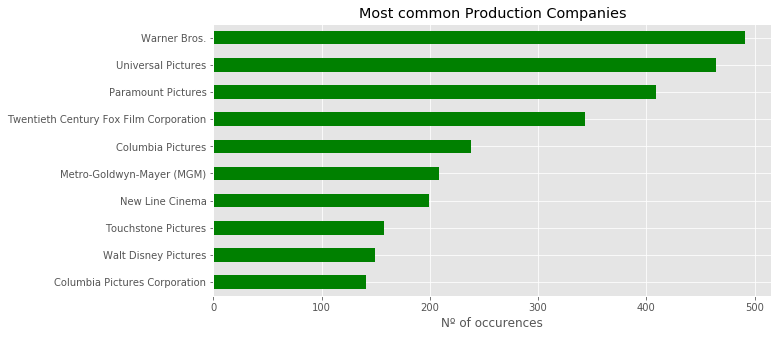

In [78]:
plt.subplots(figsize = (10, 5))

ax = pd.Series(production_companies_counter).sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Nº of occurences")
ax.set_title("Most common Production Companies") 

plt.show()

**<font color='red'>
    Esto es lo mismo que con los géneros, hago el gráfico que me saca las 10 productoras con mayor recaudación media en sus películas
</font>**

What are the production companies that have more average revenue?

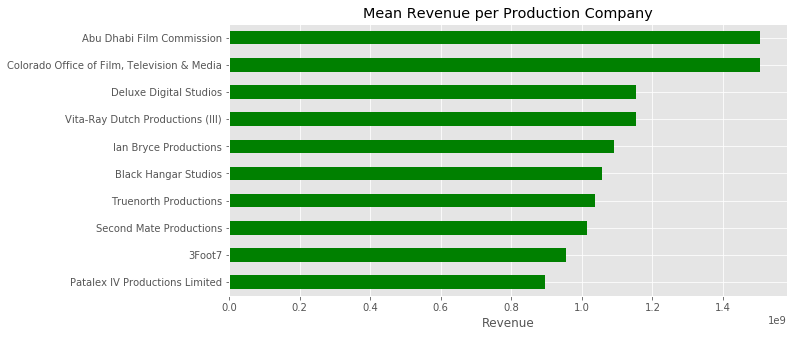

In [79]:
production_companies_dict = rf.word_mean(cleaned_reves, "production_companies", "revenue")

plt.subplots(figsize = (10, 5))

ax = pd.Series(production_companies_dict).sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Revenue")
ax.set_title("Mean Revenue per Production Company") 

plt.show()

Movies with no production companies?

In [80]:
(cleaned_reves["production_companies"].str.len() == 0).sum()

426

####  Production Countries

In [81]:
cleaned_reves["production_countries"].sample(5)

3610    [{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...
3182    [{'iso_3166_1': 'US', 'name': 'United States o...
5888    [{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...
2739    [{'iso_3166_1': 'US', 'name': 'United States o...
685                                                    []
Name: production_countries, dtype: object

Almost the same as before

In [82]:
cleaned_reves["production_countries"] = rf.to_list(cleaned_reves["production_countries"], "name")

In [83]:
cleaned_reves["production_countries"].head()

0    [United States of America]
1    [United States of America]
2    [United States of America]
3    [United States of America]
4    [United States of America]
Name: production_countries, dtype: object

In [84]:
stats.describe(np.array(cleaned_reves["production_countries"].str.len()))

DescribeResult(nobs=7537, minmax=(0, 12), mean=1.3404537614435452, variance=0.64708010192885668, skewness=2.987479654035032, kurtosis=15.626836710362493)

Results from the stats:

- We have movies with no production country
- 12 maximum genres per movie
- Mean of 1.34 production countries per movie 

Let's see if the number of production countries affects to the revenue.

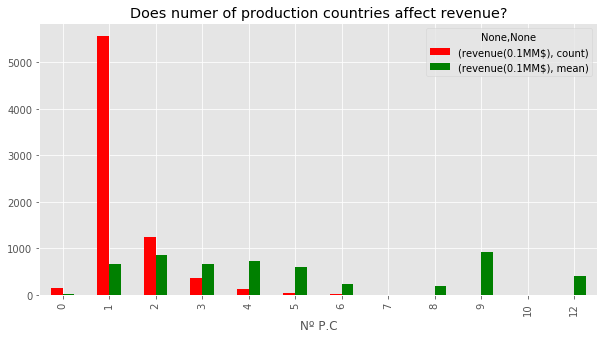

In [85]:
pd.DataFrame(
    {"revenue(0.1MM$)": cleaned_reves["revenue"] / 100000,
     "Nº P.C": [len(x) for x in cleaned_reves["production_countries"]]}
).groupby("Nº P.C").agg(["count", "mean"]).plot.bar(figsize = (10, 5), color = ["red", "green"])
plt.title("Does numer of production countries affect revenue?");

We see that most of the films only have 1 production country and that there is not much difference with respect to the revenue.

Movies with no production countries?

In [86]:
(cleaned_reves["production_countries"].str.len() == 0).sum()

156

As this variable is not relevant we eliminate it

In [87]:
cleaned_reves = cleaned_reves.drop(["production_countries"], axis = 1)

#### Release Date

Release Date can be a very significant variable in our model since we assume that the movies released nearby certain months or times of the year, can reach more revenue more easily.

Release year can not be used in the model, but we'll keep it as it will be useful to do some data engineering in the following notebook.

In [88]:
print(cleaned_reves["release_date"].sample(5))
print("There are %d null values" % (cleaned_reves["release_date"].isnull().sum()))

2270    2002-02-01
93      1995-09-01
226     1993-05-21
3960    2006-05-16
5421    2012-03-02
Name: release_date, dtype: object
There are 1 null values


In [89]:
type(cleaned_reves["release_date"][2255])

str

Info is stored in string format, so we should transform that to Date format, in order to be useful. It is possible that the revenue is related to the year, month and day of the week released.

In [90]:
cleaned_reves["release_date"] = pd.to_datetime(cleaned_reves["release_date"])

In [91]:
cleaned_reves["release_date"].head()

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-02-10
4   1995-12-15
Name: release_date, dtype: datetime64[ns]

In [92]:
cleaned_reves["release_year"] = (cleaned_reves["release_date"].apply(lambda x: x.year))

In [93]:
cleaned_reves["release_month"] = cleaned_reves["release_date"].apply(lambda x: x.month)

In [94]:
cleaned_reves["release_weekday"] = cleaned_reves["release_date"].apply(lambda x: x.dayofweek)

Release Year could be related with revenue as the price of the ticket and the value of money itself has changed through time. We should do some transformation to this variable in the following notebook.

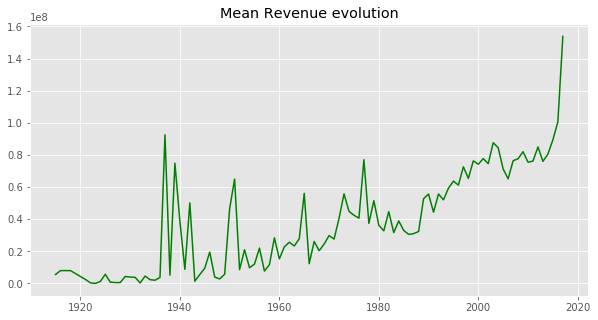

In [95]:
plt.subplots(figsize = (10, 5))
plt.plot(cleaned_reves.groupby("release_year")["release_year"].count().index
         ,cleaned_reves.groupby("release_year")["revenue"].mean()
         ,c="green",label="mean revenue")
plt.title("Mean Revenue evolution");

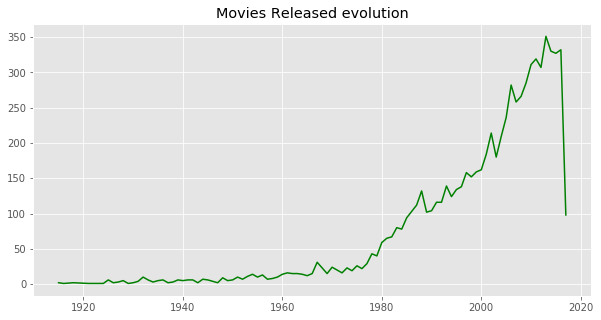

In [96]:
plt.subplots(figsize = (10, 5))
plt.plot(cleaned_reves.groupby("release_year")["release_year"].count().index
         ,cleaned_reves.groupby("release_year")["revenue"].count()
         ,c="green",label="mean revenue")
plt.title("Movies Released evolution");

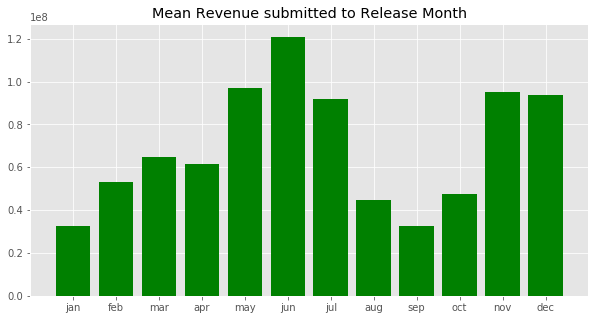

In [97]:
plt.subplots(figsize = (10, 5))
plt.bar(cleaned_reves.groupby("release_month")["release_year"].count().index
         ,cleaned_reves.groupby("release_month")["revenue"].mean(),
       color="green",label="mean revenue",
        tick_label=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])
plt.title("Mean Revenue submitted to Release Month");

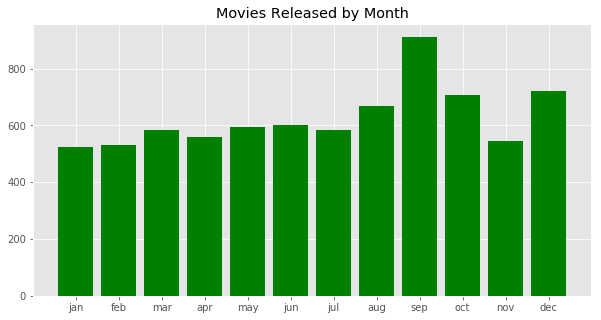

In [98]:
plt.subplots(figsize = (10, 5))
plt.bar(cleaned_reves.groupby("release_month")["release_year"].count().index
         ,cleaned_reves.groupby("release_month")["revenue"].count(),
       color="green",label="mean revenue",
        tick_label=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])
plt.title("Movies Released by Month");

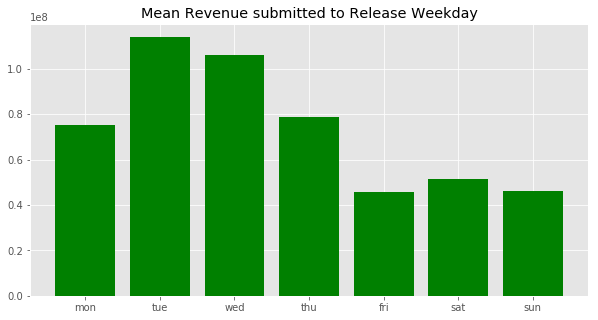

In [99]:
plt.subplots(figsize = (10, 5))
plt.bar(cleaned_reves.groupby("release_weekday")["release_weekday"].count().index
         ,cleaned_reves.groupby("release_weekday")["revenue"].mean(),
       color="green",label="mean revenue",
        tick_label=["mon","tue","wed","thu","fri","sat","sun"])
plt.title("Mean Revenue submitted to Release Weekday");

**<font color='red'>
    He visto que efectivamente los números de la semana son lunes 0 hasta domingo 6
</font>**

**<font color='red'>
    Películas que han salido el martes
</font>**

In [100]:
cleaned_reves[cleaned_reves["release_weekday"] == 1][["title", "revenue", "release_date"]].sort_values(by = "revenue", ascending = False).head(10)

,title,revenue,release_date
6309,Star Wars: The Force Awakens,2.068224e+09,2015-12-15
759,Titanic,1.845034e+09,1997-11-18
6221,Jurassic World,1.513529e+09,2015-06-09
5103,Transformers: Dark of the Moon,1.123747e+09,2011-06-28
3789,Pirates of the Caribbean: Dead Man's Chest,1.065660e+09,2006-06-20
5725,Despicable Me 2,9.707619e+08,2013-06-25
4552,Harry Potter and the Half-Blood Prince,9.339592e+08,2009-07-07
4021,Spider-Man 3,8.908716e+08,2007-05-01
5413,Ice Age: Continental Drift,8.772448e+08,2012-06-26
2235,The Lord of the Rings: The Fellowship of the Ring,8.713684e+08,2001-12-18


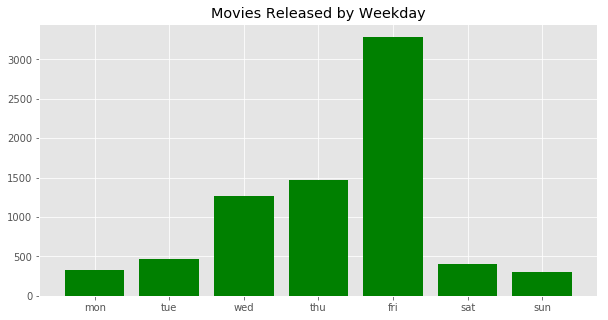

In [101]:
plt.subplots(figsize = (10, 5))
plt.bar(cleaned_reves.groupby("release_weekday")["release_weekday"].count().index
         ,cleaned_reves.groupby("release_weekday")["revenue"].count(),
       color="green",label="mean revenue",
        tick_label=["mon","tue","wed","thu","fri","sat","sun"])
plt.title("Movies Released by Weekday");


Looks that though the most-average-revenue-releaseweekday is tuesday, most movies are released on Friday

Movies with no release date?

In [102]:
cleaned_reves["release_date"].isnull().sum()

1

**<font color='red'>
    Esta celda a continuación la he añadido para eliminar ya la película que no tiene fecha, ya que luego, a la hora de hacer las transformaciones provoca error
</font>**

In [103]:
cleaned_reves = cleaned_reves[cleaned_reves["release_date"].notnull()].reset_index(drop = True)

In [104]:
cleaned_reves = cleaned_reves.drop(["release_date"], axis = 1)

#### Runtime

In [105]:
cleaned_reves["runtime"].sample(5)

2042     90.0
6908    100.0
4295    125.0
4689    146.0
7056     97.0
Name: runtime, dtype: float64

In [106]:
cleaned_reves["runtime"].describe()

count    7530.000000
mean      107.746215
std        21.447431
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Relation between runtime and revenue?

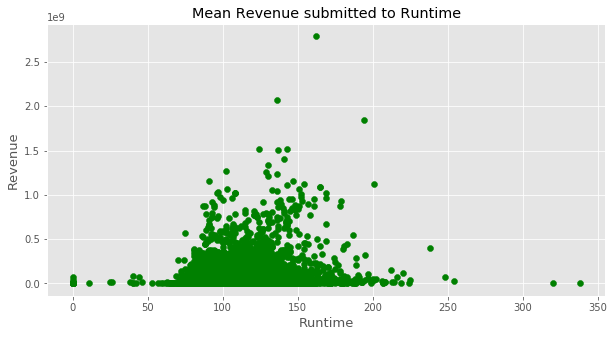

In [107]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = cleaned_reves["runtime"], y = cleaned_reves["revenue"],color="green")

plt.ylabel("Revenue", fontsize = 13)
plt.xlabel("Runtime", fontsize = 13)
plt.title("Mean Revenue submitted to Runtime")
plt.show()

We see that there is not a very strong relationship between these two variables. Most movies have a runtime between 90 and 120 minutes and we see that the collection is very varied.

Movies with no runtime data or zero minutes?

In [108]:
cleaned_reves[(cleaned_reves["runtime"].isnull()) | (cleaned_reves["runtime"] <= 0)].shape

(27, 15)

#### Spoken Languages

In [109]:
cleaned_reves["spoken_languages"].sample(5)

7260    [{'iso_639_1': 'my', 'name': ''}, {'iso_639_1'...
4866             [{'iso_639_1': 'en', 'name': 'English'}]
3058             [{'iso_639_1': 'en', 'name': 'English'}]
6105             [{'iso_639_1': 'en', 'name': 'English'}]
6707    [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...
Name: spoken_languages, dtype: object

Almost same as before

In [110]:
cleaned_reves["spoken_languages"] = rf.to_list(cleaned_reves["spoken_languages"], "name")

In [111]:
cleaned_reves["spoken_languages"].head()

0              [English]
1    [English, Français]
2              [English]
3              [English]
4     [English, Español]
Name: spoken_languages, dtype: object

In [112]:
stats.describe(np.array(cleaned_reves["spoken_languages"].str.len()))

DescribeResult(nobs=7536, minmax=(0, 9), mean=1.4447983014861996, variance=0.79668694006878027, skewness=2.5600838309580616, kurtosis=8.898362467393637)

We have movies with no spoken languages and movies with 9. The mean per movie are 1.44.

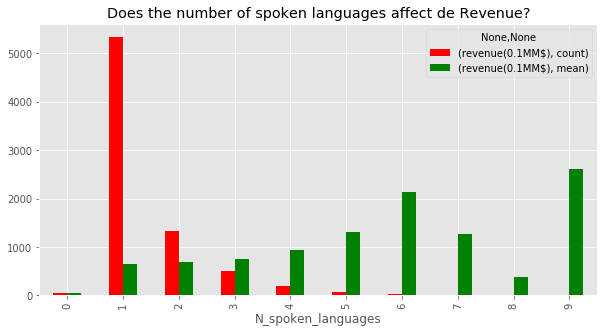

In [113]:
pd.DataFrame(
    {"revenue(0.1MM$)": cleaned_reves["revenue"] / 100000,
     "N_spoken_languages": [len(x) for x in cleaned_reves["spoken_languages"]]}
).groupby("N_spoken_languages").agg(["count", "mean"]).plot.bar(figsize = (10, 5), color = ["red", "green"])
plt.title("Does the number of spoken languages affect de Revenue?");

We see that most of the films only have 1 spoken language and that there is not much difference with respect to the revenue.

Movies with no language info?

In [114]:
(cleaned_reves["spoken_languages"].str.len() == 0).sum()

57

As this variable is not relevant we eliminate it

In [115]:
cleaned_reves = cleaned_reves.drop(["spoken_languages"], axis = 1)

#### Title

In [116]:
cleaned_reves["title"].sample(5)

7333                 One Piece Film: GOLD
3116                       Hamburger Hill
4976    Happy People: A Year in the Taiga
3372                    A Heart in Winter
6640                    Our Little Sister
Name: title, dtype: object

In [117]:
cleaned_reves["title"].isnull().sum()

0

**<font color='red'>
    Lo que viene a continuación lo he añadido porque me di cuenta de que había películas repetidas y duplicadas. Para esto también me sirve la variable imdb_id, y así me quedo solo con una y me cargo las duplicadas
</font>**

There are duplicated values?

In [118]:
cleaned_reves[cleaned_reves.duplicated("imdb_id")].shape

(139, 14)

In [119]:
cleaned_reves = cleaned_reves.drop_duplicates("imdb_id").reset_index(drop = True)

#### Cast

In [120]:
cleaned_reves["cast"][0][0:1000]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

As we see above we have the following keys per movie:

* cast_id
* character
* credit_id
* gender
* id
* name
* order
* profile_path

We can also see that the information is stored in lists of dicts. As we did before with genres we are transforming it into a list and extracting only the important information. 

In [121]:
cleaned_reves["cast_names"] = rf.to_list(cleaned_reves["cast"], "name")
cleaned_reves["cast_gender"] = rf.to_list(cleaned_reves["cast"], "gender")
cleaned_reves["cast_order"] = rf.to_list(cleaned_reves["cast"], "order")
cleaned_reves = cleaned_reves.reset_index(drop = True)

In [122]:
cleaned_reves.head(3)

,belongs_to_collection,genres,imdb_id,original_language,production_companies,revenue,runtime,title,cast,crew,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,cast_order
0,Toy Story Collection,"[Animation, Comedy, Family]",tt0114709,en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995.0,10.0,0.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,NaN,"[Adventure, Fantasy, Family]",tt0113497,en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995.0,12.0,4.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,NaN,"[Comedy, Drama, Romance]",tt0114885,en,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",1995.0,12.0,4.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"


Let's see if the number of the cast affects to the revenue.

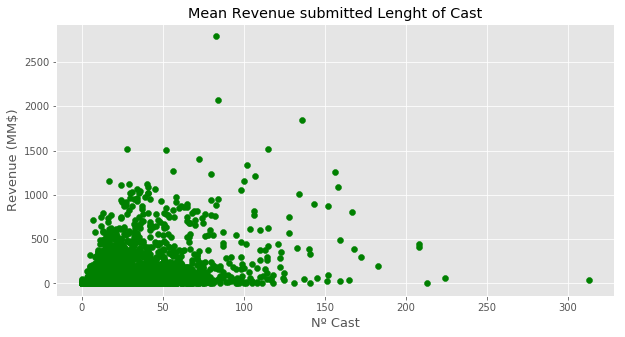

In [123]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = cleaned_reves["cast_names"].str.len(), y = cleaned_reves["revenue"]/1e6, color="green")

plt.ylabel("Revenue (MM$)", fontsize = 13)
plt.xlabel("Nº Cast", fontsize = 13)
plt.title("Mean Revenue submitted Lenght of Cast")

plt.show()

The films that collect more than $ 1000 million do not have a relationship in terms of the amount of the cast. For films with lower revenue we see that it increases until reaching a cast of approximately 40 actors, and from that value, we see that the revenue tends to decrease.

Next question: Does the actor's/actresse's genre influence the revenue? Let's look at the average revenue.
    - 2: Male
    - 1: Female

In [124]:
cleaned_reves["cast_gender"].head()

0              [2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]
1    [2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...
2                       [1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
3                 [2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1]
4    [2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, ...
Name: cast_gender, dtype: object

In [125]:
male_revenue = []
female_revenue = []
for index, gender_list in enumerate(cleaned_reves["cast_gender"]):
    for gender in gender_list:
        if gender == 2:
            male_revenue.append(cleaned_reves.get_value(index, "revenue"))
        elif gender == 1:
            female_revenue.append(cleaned_reves.get_value(index, "revenue"))

In [126]:
print("There are %d actors" %(len(male_revenue)))
print("There are %d actresses" %(len(female_revenue)))

There are 69899 actors
There are 34528 actresses


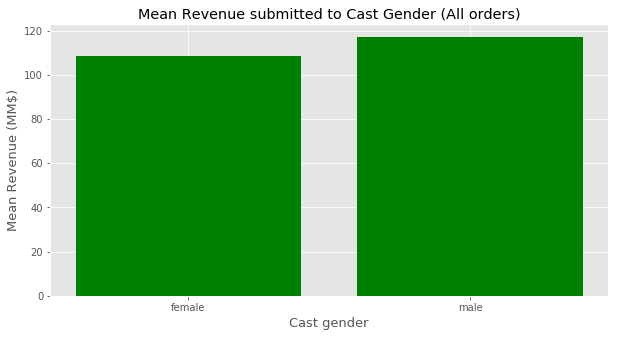

In [127]:
plt.figure(figsize = (10, 5))
plt.bar(["male", "female"], [np.mean(male_revenue)/1e6, np.mean(female_revenue)/1e6], color = "green")
plt.ylabel("Mean Revenue (MM$)", fontsize = 13)
plt.xlabel("Cast gender", fontsize = 13)
plt.title("Mean Revenue submitted to Cast Gender (All orders)")
plt.show()

We see that the actors have on average a little more revenue than the actresses, but the value is very similar. Where there is a lot of difference is that there are more than double actors than actresses.

Does the order influence? Let's see these same results for the 4 main roles of a movie. But first let's check if the cast order column is indeed in order.

In [128]:
print(rf.is_ordered([0, 1, 2, 3, 4, 5, 6]))
print(rf.is_ordered([0, 1, 6, 3, 4, 5, 6]))
print(rf.is_ordered([0, 0, 0, 1, 5, 6]))

True
False
True


In [129]:
cleaned_reves[cleaned_reves["cast_order"].apply(rf.is_ordered) == False]

,belongs_to_collection,genres,imdb_id,original_language,production_companies,revenue,runtime,title,cast,crew,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,cast_order


Cast values are in order, so let's calculate.

In [130]:
male_revenue = []
female_revenue = []
for index, gender_list in enumerate(cleaned_reves["cast_gender"]):
    for gender in gender_list[:3]:
        if gender == 2:
            male_revenue.append(cleaned_reves.get_value(index, "revenue"))
        elif gender == 1:
            female_revenue.append(cleaned_reves.get_value(index, "revenue"))

In [131]:
print("There are %d actors" %(len(male_revenue)))
print("There are %d actresses" %(len(female_revenue)))

There are 12818 actors
There are 6943 actresses


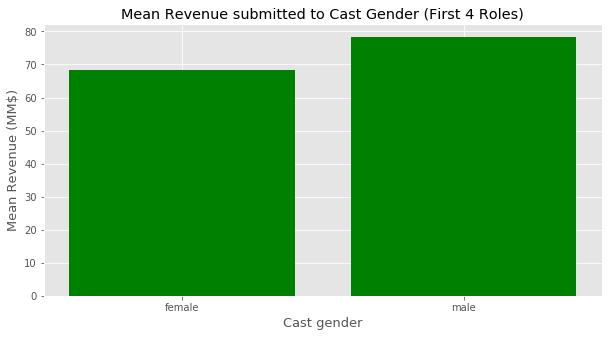

In [132]:
plt.figure(figsize = (10, 5))
plt.bar(["male", "female"], [np.mean(male_revenue)/1e6, np.mean(female_revenue)/1e6],color="green")
plt.ylabel("Mean Revenue (MM$)", fontsize = 13)
plt.xlabel("Cast gender", fontsize = 13)
plt.title("Mean Revenue submitted to Cast Gender (First 4 Roles)")
plt.show()

We see that there is not much difference in terms of gender if we take the 4 main protagonists versus if we took the full cast.

What if we only take into account the main character?

In [133]:
male_revenue = []
female_revenue = []
for index, gender_list in enumerate(cleaned_reves["cast_gender"]):
    for gender in gender_list[:1]:
        if gender == 2:
            male_revenue.append(cleaned_reves.get_value(index, "revenue"))
        elif gender == 1:
            female_revenue.append(cleaned_reves.get_value(index, "revenue"))

In [134]:
print("There are %d actors" %(len(male_revenue)))
print("There are %d actresses" %(len(female_revenue)))

There are 5070 actors
There are 1713 actresses


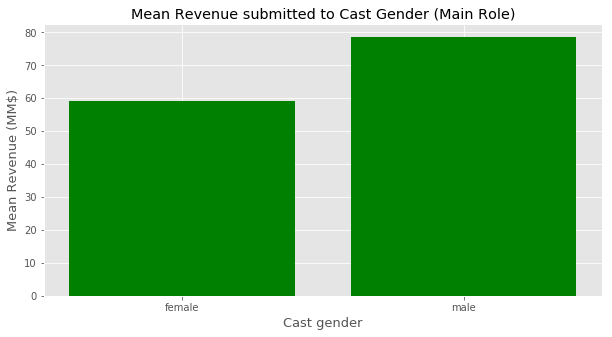

In [135]:
plt.figure(figsize = (10, 5))
plt.bar(["male", "female"], [np.mean(male_revenue)/1e6, np.mean(female_revenue)/1e6], color = "green")
plt.ylabel("Mean Revenue (MM$)", fontsize = 13)
plt.xlabel("Cast gender", fontsize = 13)
plt.title("Mean Revenue submitted to Cast Gender (Main Role)")
plt.show()

Now we see a little more difference. From the outset, there are three times more films with male protagonists than female protagonists. And in addition, the films whose protagonist is a man have an average revenue $ 30 million more than the films starring women.

Who are the actors / actresses with the highest average revenue?

In [136]:
cast_counter = rf.word_count(cleaned_reves, "cast_names")
cast_list = np.array(list(cast_counter.keys()))
cast_list_count = np.array(list(cast_counter.values()))

In [137]:
cast_dict_revenue = {}
for index, artists_list in enumerate(cleaned_reves["cast_names"]):
    for artist in artists_list:
        if artist not in cast_dict_revenue:
            cast_dict_revenue[artist] = cleaned_reves.get_value(index, "revenue")
        else:
            cast_dict_revenue[artist] = cast_dict_revenue[artist] + cleaned_reves.get_value(index, "revenue")   

In [138]:
cast_list_revenue = np.array(list(cast_dict_revenue.values()))

In [139]:
cleaned_reves_cast = pd.DataFrame(
    {"Name": cast_list,
     "N_Movies": cast_list_count,
     "Revenue": cast_list_revenue / 1e6,
     "Average_Revenue": (cast_list_revenue / cast_list_count) / 1e6}
)

In [140]:
cleaned_reves_cast.head()

,Average_Revenue,N_Movies,Name,Revenue
0,220.803159,45,Tom Hanks,9936.142170
1,236.084585,14,Tim Allen,3305.184195
2,349.562580,6,Don Rickles,2097.375480
3,221.737224,5,Jim Varney,1108.686118
4,141.886036,29,Wallace Shawn,4114.695039


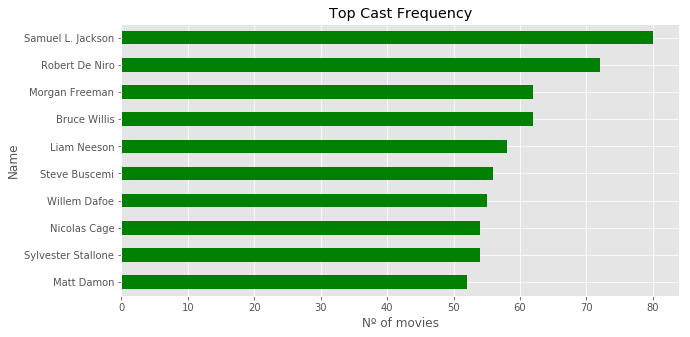

In [141]:
plt.subplots(figsize = (10, 5))

ax = cleaned_reves_cast.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh(color="green")
ax.set_xlabel("Nº of movies")
ax.set_title("Top Cast Frequency") 

plt.show()

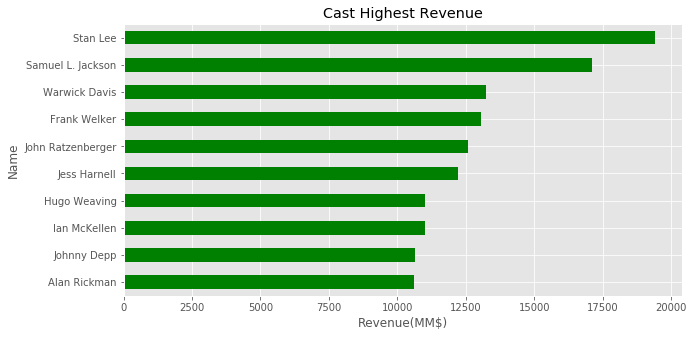

In [142]:
plt.subplots(figsize = (10, 5))

ax = (cleaned_reves_cast.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color="green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Revenue") 

plt.show()

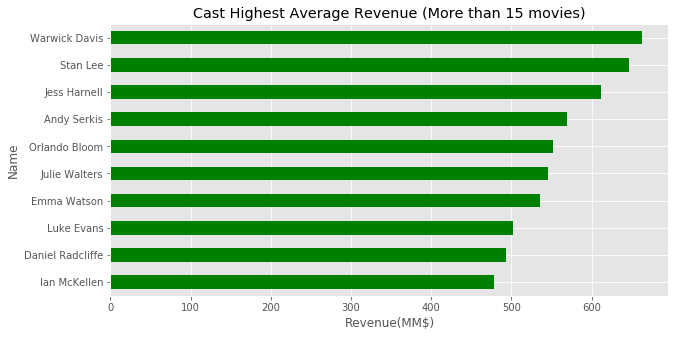

In [143]:
plt.subplots(figsize = (10, 5))

ax = (cleaned_reves_cast[cleaned_reves_cast["N_Movies"] > 15].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color="green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Average Revenue (More than 15 movies)") 

plt.show()

Let's see the same plots but only taking into account the 4 main protagonist of the movie

In [144]:
cast_counter = rf.word_count(cleaned_reves, "cast_names", n = 4)
cast_list = np.array(list(cast_counter.keys()))
cast_list_count = np.array(list(cast_counter.values()))

cast_dict_revenue = {}
for index, artists_list in enumerate(cleaned_reves["cast_names"]):
    for artist in artists_list[:4]:
        if artist not in cast_dict_revenue:
            cast_dict_revenue[artist] = cleaned_reves.get_value(index, "revenue")
        else:
            cast_dict_revenue[artist] = cast_dict_revenue[artist] + cleaned_reves.get_value(index, "revenue")

cast_list_revenue = np.array(list(cast_dict_revenue.values()))

cleaned_reves_cast_main = pd.DataFrame(
    {"Name": cast_list,
     "N_Movies": cast_list_count,
     "Revenue": cast_list_revenue / 1e6,
     "Average_Revenue": (cast_list_revenue / cast_list_count) / 1e6}
)

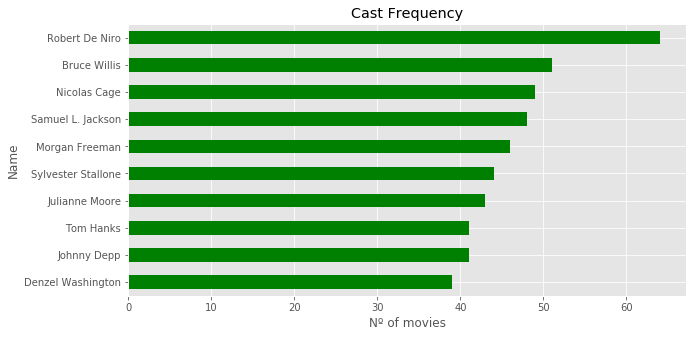

In [145]:
plt.subplots(figsize = (10, 5))

ax = cleaned_reves_cast_main.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh(color="green")
ax.set_xlabel("Nº of movies")
ax.set_title("Cast Frequency") 

plt.show()

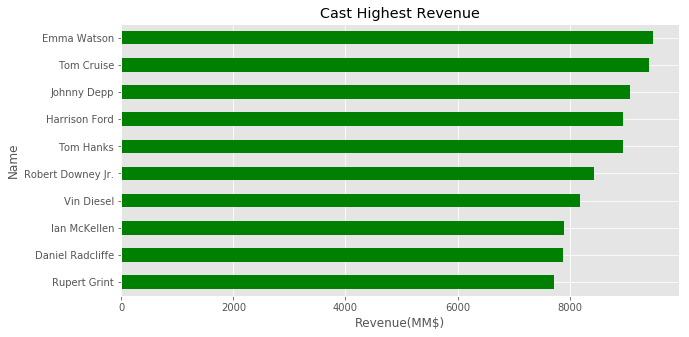

In [146]:
plt.subplots(figsize = (10, 5))

ax = (cleaned_reves_cast_main.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color="green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Revenue") 

plt.show()

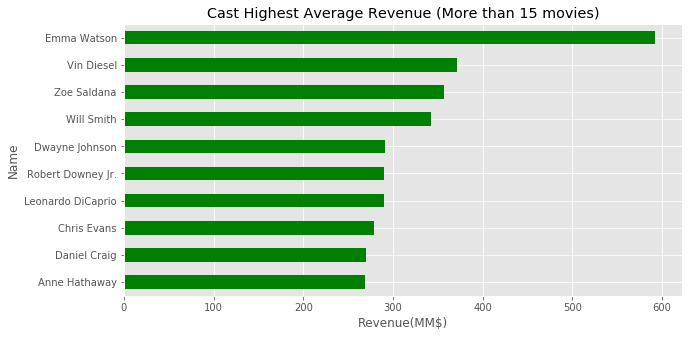

In [147]:
plt.subplots(figsize = (10, 5))

ax = (cleaned_reves_cast_main[cleaned_reves_cast_main["N_Movies"] > 15].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color="green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Cast Highest Average Revenue (More than 15 movies)") 

plt.show()

We see that the plots are different, so clearly the order of the actors in a film is related to the revenue. It is not the same to have certain actors among the 4 main roles.

We also see that most of these actors with the highest average revenue are actors that belong to a franchise (for example: Harry Potter, The Fast and the Furious, Marvel).

In order to build our model, we have seen that it can be useful to take into account:
* The length of the cast.
* Number of men and women in the cast.
* Who are the 4 main actors.

In [148]:
cleaned_reves[cleaned_reves["cast"].str.len() == 0].shape

(0, 17)

In [149]:
cleaned_reves = cleaned_reves.drop(["cast"], axis = 1)

In [150]:
cleaned_reves = cleaned_reves.drop(["cast_order"], axis = 1)

#### Crew

In [151]:
cleaned_reves["crew"][0][0:1000]

"[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depar

In this case we don't know the keys we want as we did in the cast column. For this reason, we have first to convert this column into a list of dictionaries and take a deeper look at what we have.

In [152]:
cleaned_reves = rf.to_dict(cleaned_reves, "crew")

In [153]:
cleaned_reves["crew"][0][0:2]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}]

We are going how many departments are there and how many diferent jobs per department do exist. For this task we will create a dictionary in which the key will be the department and the values will be the diferent jobs.

In [154]:
departments_dict = {}

for i in cleaned_reves["crew"]:   
    for j in range(len(i)): 
        
        department = list(filter(lambda item: item[0] == "department", i[j].items()))[0][1]
        job = list(filter(lambda item: item[0] == "job", i[j].items()))[0][1]
        
        if department not in departments_dict:
            departments_dict[department] = [job]
            
        else:
            if job not in departments_dict[department]:
                departments_dict[department] += [job]

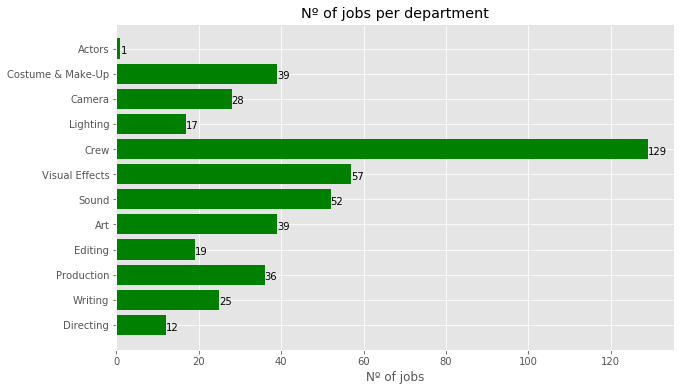

In [155]:
fig, ax = plt.subplots(figsize = (10, 6))

values = list(map(lambda value: len(value), departments_dict.values()))
departments = list(departments_dict.keys())
y_pos = np.arange(len(departments))

ax.barh(y_pos, values, color = "green")
ax.set_yticks(y_pos)
ax.set_yticklabels(departments)

for i, v in enumerate(values):
    ax.text(v, i - 0.2, str(v), fontsize = 10)

ax.set_xlabel("Nº of jobs")
ax.set_title("Nº of jobs per department")    
    
plt.show()

In [156]:
for department in ["Production", "Writing", "Directing"]:
    print(department + "\n", departments_dict[department],"\n")

Production
 ['Producer', 'Executive Producer', 'Production Supervisor', 'Production Coordinator', 'Casting Consultant', 'ADR Voice Casting', 'Casting', 'Associate Producer', 'Unit Production Manager', 'Casting Associate', 'Co-Producer', 'Location Manager', 'Production Accountant', 'Production Manager', 'Line Producer', 'Assistant Production Manager', 'Casting Assistant', 'Local Casting', 'Finance', 'Co-Executive Producer', 'Executive In Charge Of Post Production', 'Executive In Charge Of Production', 'Publicist', 'Unit Manager', 'Production Office Coordinator', 'Other', 'Assistant Production Coordinator', 'Character Technical Supervisor', 'Researcher', 'Executive Consultant', 'Administration', 'Supervising Producer', 'Script Researcher', 'Production Director', 'Development Manager', 'Consulting Producer'] 

Writing
 ['Screenplay', 'Original Story', 'Novel', 'Characters', 'Story', 'Writer', 'Author', 'Storyboard', 'Scenario Writer', 'Theatre Play', 'Screenstory', 'Book', 'Other', 'Adapt

As showed above, in each list there are diferent dicts with information about the whole cast. There are several departments and different jobs per department.

At a first instance, we will focus on obtaining the name of the director, producer and scriptwriter as we consider that they may have something to do with the revenue.

- Director name = Department Directing => job Director
- Producer name = Department Production => job Producer
- Screenplay name = Department Writing => job Screenplay

In [157]:
# This code is using list comprehension. We go through the crew column and extract the required information

producers_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Production" and i[j]["job"] == "Producer"] 
                for i in cleaned_reves["crew"]]

directors_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Directing" and i[j]["job"] == "Director"] 
                for i in cleaned_reves["crew"]]

screenplayers_df = [[i[j]["name"] for j in range(len(i)) 
                 if i[j]["department"] == "Writing" and i[j]["job"] == "Screenplay"] 
                 for i in cleaned_reves["crew"]]

In [158]:
print(producers_df[:4])
print(directors_df[:4])
print(screenplayers_df[:4])

[['Bonnie Arnold', 'Ralph Guggenheim'], ['Scott Kroopf', 'William Teitler'], ['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schindler', 'Caron K'], ['Nancy Meyers']]
[['John Lasseter'], ['Joe Johnston'], ['Forest Whitaker'], ['Charles Shyer']]
[['Joss Whedon', 'Andrew Stanton', 'Joel Cohen', 'Alec Sokolow'], ['Jonathan Hensleigh', 'Greg Taylor', 'Jim Strain'], ['Ronald Bass', 'Terry McMillan'], ['Nancy Meyers', 'Albert Hackett']]


Introduce in the Data Frame and remove the crew original column

In [159]:
# Remove originals cast and crew columns
cleaned_reves.drop("crew", axis = 1, inplace = True)

# Creation new columns
cleaned_reves["Directors"] = pd.Series(directors_df).values
cleaned_reves["Producers"] = pd.Series(producers_df).values
cleaned_reves["Screenplayers"] = pd.Series(screenplayers_df).values

In [160]:
cleaned_reves.head(3)

,belongs_to_collection,genres,imdb_id,original_language,production_companies,revenue,runtime,title,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,Directors,Producers,Screenplayers
0,Toy Story Collection,"[Animation, Comedy, Family]",tt0114709,en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995.0,10.0,0.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]",[John Lasseter],"[Bonnie Arnold, Ralph Guggenheim]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec..."
1,NaN,"[Adventure, Fantasy, Family]",tt0113497,en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995.0,12.0,4.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...",[Joe Johnston],"[Scott Kroopf, William Teitler]","[Jonathan Hensleigh, Greg Taylor, Jim Strain]"
2,NaN,"[Comedy, Drama, Romance]",tt0114885,en,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...",1995.0,12.0,4.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]",[Forest Whitaker],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[Ronald Bass, Terry McMillan]"


In [161]:
print(cleaned_reves[cleaned_reves["Directors"].str.len() == 0].shape)
print(cleaned_reves[cleaned_reves["Producers"].str.len() == 0].shape)
print(cleaned_reves[cleaned_reves["Screenplayers"].str.len() == 0].shape)

(12, 17)
(1535, 17)
(2959, 17)


**<font color='red'>
Para poder rellenar los datos del director y del guionista utilizamos los dataframes disponibles en la web de imdb.
<br>
En esta web está la explicación del contenido de cada uno de los dataframes: https://www.imdb.com/interfaces/
<br>
Y en esta web tienes los enlaces para descargarlos: https://datasets.imdbws.com/
</font>**

In [162]:
people_imdb = pd.read_csv("data/imdb/name_basics.zip", sep = "\t", compression = "zip")
dictionary = {}
for x, y in zip(people_imdb["nconst"], people_imdb["primaryName"]):
    dictionary[x] = y
    
crew_imdb = pd.read_csv("data/imdb/title_crew.zip", sep = "\t", compression = "zip")
crew_imdb = crew_imdb[crew_imdb["writers"] != "\\N"]
crew_imdb.columns = ["imdb_id", "directors", "writers"]

cleaned_reves = pd.merge(crew_imdb, cleaned_reves, on = ["imdb_id"])
cleaned_reves["writers"] = cleaned_reves["writers"].apply(lambda x: x.split(","))
cleaned_reves["writers"] = cleaned_reves["writers"].apply(lambda x: [dictionary[c] for c in x])
cleaned_reves["directors"] = cleaned_reves["directors"].apply(lambda x: x.split(","))
cleaned_reves["directors"] = cleaned_reves["directors"].apply(lambda x: [dictionary[c] for c in x])

In [163]:
print(cleaned_reves[cleaned_reves["directors"].str.len() == 0].shape)
print(cleaned_reves[cleaned_reves["Producers"].str.len() == 0].shape)
print(cleaned_reves[cleaned_reves["writers"].str.len() == 0].shape)

(0, 19)
(1483, 19)
(0, 19)


**<font color='red'>
Ahora vemos que tenemos datos del director y guionista. Como no hemos podido obtener los datos del productor eliminamos ese dato. También eliminamos las columnas existentes con los datos del director y guionista ya que los sustituimos por los obtenidos de la tabla de imdb
</font>**

In [164]:
cleaned_reves.drop("Directors", axis = 1, inplace = True)
cleaned_reves.drop("Producers", axis = 1, inplace = True)
cleaned_reves.drop("Screenplayers", axis = 1, inplace = True)

It could be interesting to analyze if the length of all the crew influences the revenue, but we consider that it is an impractical information when it comes to predicting a new movie. However, we could analyze if the collection of a film changes depending on whether there is one or more directors.

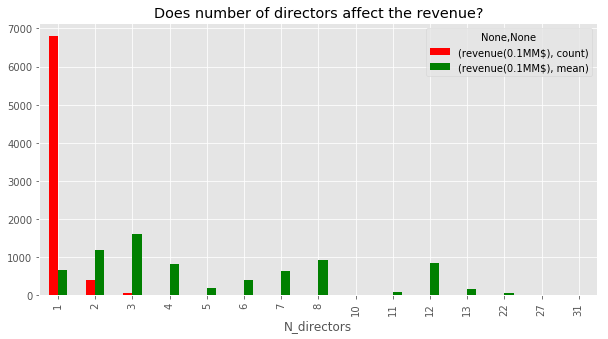

In [165]:
pd.DataFrame(
    {"revenue(0.1MM$)":  cleaned_reves["revenue"] / 1e5,
     "N_directors": [len(x) for x in cleaned_reves["directors"]]}
).groupby("N_directors").agg(["count", "mean"]).plot.bar(figsize = (10, 5), color = ["red", "green"])
plt.title("Does number of directors affect the revenue?");

We see that most films have a single director and that the number of films with more than one director is not significant enough to say that the revenue depends on it.

Now let's see who are the directors, producers and scriptwriters with the highest average collection

#### Directors 

In [166]:
director_counter = rf.word_count(cleaned_reves, "directors")
director_list = np.array(list(director_counter.keys()))
director_list_count = np.array(list(director_counter.values()))

director_dict_revenue = {}
for index, artists_list in enumerate(cleaned_reves["directors"]):
    for director in artists_list:
        if director not in director_dict_revenue:
            director_dict_revenue[director] = cleaned_reves.get_value(index, "revenue")
        else:
            director_dict_revenue[director] = director_dict_revenue[director] + cleaned_reves.get_value(index, "revenue")

director_list_revenue = np.array(list(director_dict_revenue.values()))

df_director = pd.DataFrame(
    {"Name": director_list,
     "N_Movies": director_list_count,
     "Revenue": director_list_revenue / 1e6,
     "Average_Revenue": (director_list_revenue / director_list_count) / 1e6}
)

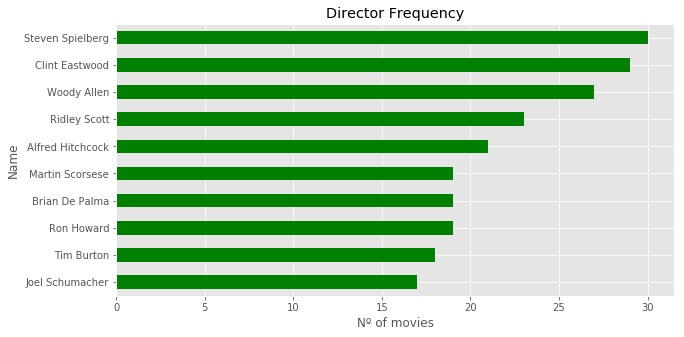

In [167]:
plt.subplots(figsize = (10, 5))

ax = df_director.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Nº of movies")
ax.set_title("Director Frequency") 

plt.show()

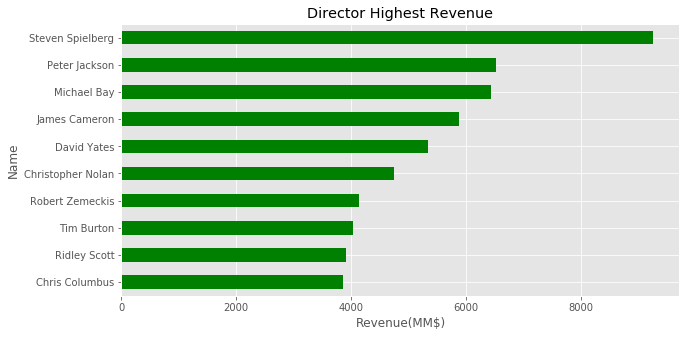

In [168]:
plt.subplots(figsize = (10, 5))

ax = (df_director.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Director Highest Revenue") 

plt.show()

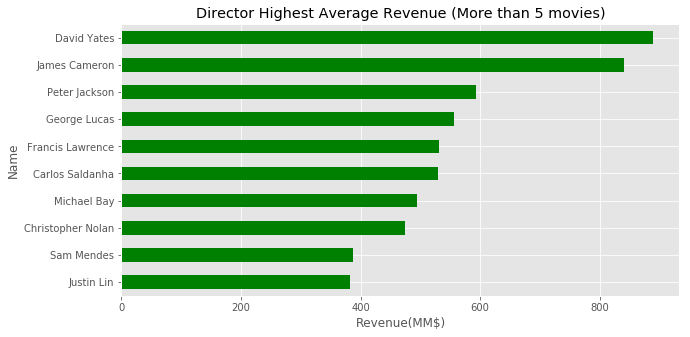

In [169]:
plt.subplots(figsize = (10, 5))

ax = (df_director[df_director["N_Movies"] > 5].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Director Highest Average Revenue (More than 5 movies)") 

plt.show()

#### Writers

In [170]:
writer_counter = rf.word_count(cleaned_reves, "writers")
writer_list = np.array(list(writer_counter.keys()))
writer_list_count = np.array(list(writer_counter.values()))

writer_dict_revenue = {}
for index, artists_list in enumerate(cleaned_reves["writers"]):
    for writer in artists_list:
        if writer not in writer_dict_revenue:
            writer_dict_revenue[writer] = cleaned_reves.get_value(index, "revenue")
        else:
            writer_dict_revenue[writer] = writer_dict_revenue[writer] + cleaned_reves.get_value(index, "revenue")

writer_list_revenue = np.array(list(writer_dict_revenue.values()))

df_writer = pd.DataFrame(
    {"Name": writer_list,
     "N_Movies": writer_list_count,
     "Revenue": writer_list_revenue / 1e6,
     "Average_Revenue": (writer_list_revenue / writer_list_count) / 1e6}
)

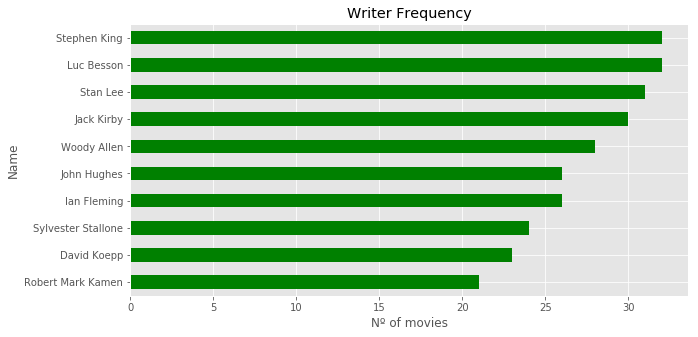

In [171]:
plt.subplots(figsize = (10, 5))

ax = df_writer.set_index("Name")["N_Movies"].sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Nº of movies")
ax.set_title("Writer Frequency") 

plt.show()

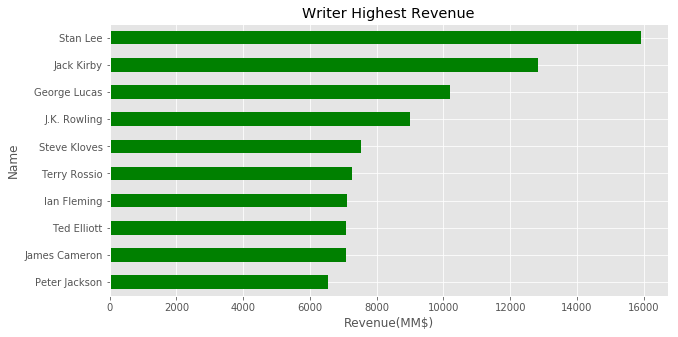

In [172]:
plt.subplots(figsize = (10, 5))

ax = (df_writer.set_index("Name")["Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Writer Highest Revenue") 

plt.show()

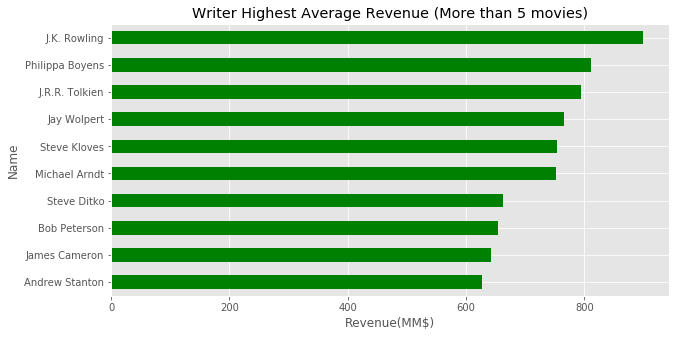

In [173]:
plt.subplots(figsize = (10, 5))

ax = (df_writer[df_writer["N_Movies"] > 5].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-10:].plot.barh(color = "green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Writer Highest Average Revenue (More than 5 movies)") 

plt.show()

#### Keywords

In [174]:
cleaned_reves["keywords"][0]

"[{'id': 529, 'name': 'ku klux klan'}, {'id': 531, 'name': 'southern usa'}, {'id': 1627, 'name': 'patriotism'}, {'id': 6092, 'name': 'army'}, {'id': 154802, 'name': 'silent film'}]"

Once again, it is a list of dicts. Let's apply our function to_list

In [175]:
cleaned_reves["keywords"] = rf.to_list(cleaned_reves["keywords"], "name")

In [176]:
cleaned_reves["keywords"].head()

0    [ku klux klan, southern usa, patriotism, army,...
1                                                   []
2                           [revenge, science fiction]
3                                   [new york, orphan]
4    [angel, suicide attempt, fistfight, slapstick,...
Name: keywords, dtype: object

We are going to analyze two things:
* Does the number of keywords in a film influences the revenue?
* What are the keywords that with higher revenue average?

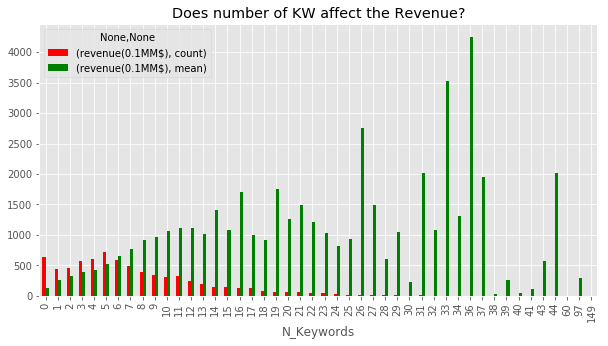

In [177]:
pd.DataFrame(
    {"revenue(0.1MM$)": cleaned_reves["revenue"] / 100000,
     "N_Keywords": [len(x) for x in cleaned_reves["keywords"]]}
).groupby("N_Keywords").agg(["count", "mean"]).plot.bar(figsize = (10, 5), color = ["red", "green"])
plt.title("Does number of KW affect the Revenue?");

We see that most movies have between 0 and 10 keywords. We also see that there is a tendency for revenue to increase as the number of keywords increases up to 12.

In [178]:
keywords_counter = rf.word_count(cleaned_reves, "keywords")
keywords_list = np.array(list(keywords_counter.keys()))
keywords_list_count = np.array(list(keywords_counter.values()))

keywords_dict_revenue = {}
for index, artists_list in enumerate(cleaned_reves["keywords"]):
    for keywords in artists_list:
        if keywords not in keywords_dict_revenue:
            keywords_dict_revenue[keywords] = cleaned_reves.get_value(index, "revenue")
        else:
            keywords_dict_revenue[keywords] = keywords_dict_revenue[keywords] + cleaned_reves.get_value(index, "revenue")

keywords_list_revenue = np.array(list(keywords_dict_revenue.values()))

cleaned_reves_keywords = pd.DataFrame(
    {"Name": keywords_list,
     "N_Movies": keywords_list_count,
     "Revenue": keywords_list_revenue / 1e6,
     "Average_Revenue": (keywords_list_revenue / keywords_list_count) / 1e6}
)

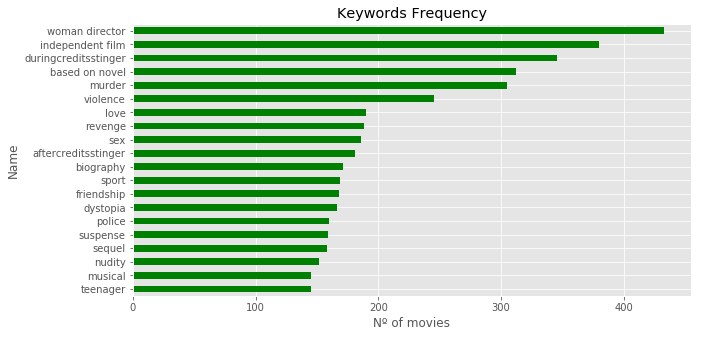

In [179]:
plt.subplots(figsize = (10, 5))

ax = cleaned_reves_keywords.set_index("Name")["N_Movies"].sort_values(ascending = True)[-20:].plot.barh(color = "green")
ax.set_xlabel("Nº of movies")
ax.set_title("Keywords Frequency") 

plt.show()

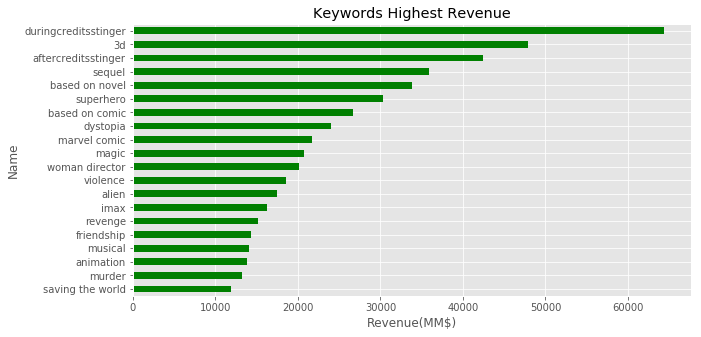

In [180]:
plt.subplots(figsize = (10, 5))

ax = (cleaned_reves_keywords.set_index("Name")["Revenue"]).sort_values(ascending = True)[-20:].plot.barh(color = "green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Keywords Highest Revenue") 

plt.show()

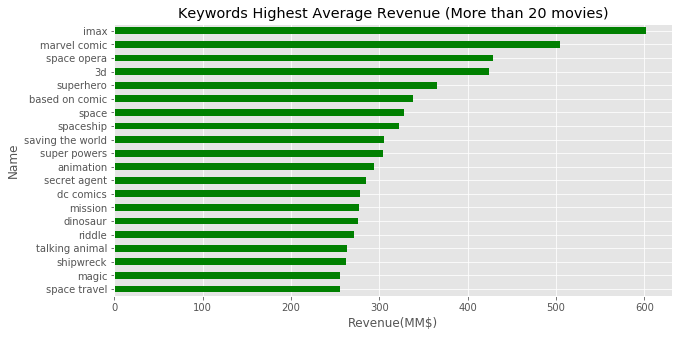

In [181]:
plt.subplots(figsize = (10, 5))

ax = (cleaned_reves_keywords[cleaned_reves_keywords["N_Movies"] > 20].set_index("Name")["Average_Revenue"]).sort_values(ascending = True)[-20:].plot.barh(color = "green")
ax.set_xlabel("Revenue(MM$)")
ax.set_title("Keywords Highest Average Revenue (More than 20 movies)") 

plt.show()

About the most average revenue keywords, we find several types:
* Related to superhero movies: comic marvel, superhero, based on comic, super powers, dc comics.
* Related to the genre of the movie: space opera, animation, riddle, animal talking (animation), anthropomorphism (animation), shipwreck.
* Related to franchises: marvel, space, spaceship, dc comics, dinosaur, magic.
* Related to the format of the movie: imax, 3d

For the model we will consider what type of keywords it contains and if it belongs to a group that is related to a high revenue.

In [182]:
cleaned_reves[cleaned_reves["keywords"].str.len() == 0].shape

(644, 16)

There are 644 records with no keywords

#### Data Frame cleaned

In [183]:
cleaned_reves.drop("imdb_id", axis = 1, inplace = True)
cleaned_reves.head(3)

,directors,writers,belongs_to_collection,genres,original_language,production_companies,revenue,runtime,title,keywords,release_year,release_month,release_weekday,cast_names,cast_gender
0,[D.W. Griffith],"[Thomas Dixon Jr., D.W. Griffith, Frank E. Woods]",NaN,"[Drama, History, War]",en,[Epoch Film Co.],11000000.0,193.0,The Birth of a Nation,"[ku klux klan, southern usa, patriotism, army,...",1915.0,2.0,0.0,"[Lillian Gish, Mae Marsh, Henry B. Walthall, M...","[1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, ..."
1,[Cecil B. DeMille],"[Hector Turnbull, Jeanie Macpherson]",NaN,[Drama],en,[Jesse L. Lasky Feature Play Company],137365.0,59.0,The Cheat,[],1915.0,12.0,0.0,"[Fannie Ward, Jack Dean, Sessue Hayakawa, Jame...","[1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2]"
2,[Stuart Paton],"[Jules Verne, Stuart Paton]",NaN,"[Adventure, Drama, Action, Science Fiction]",en,[The Universal Film Mfg. Co.],8000000.0,105.0,"20,000 Leagues Under the Sea","[revenge, science fiction]",1916.0,12.0,6.0,"[Lois Alexander, Curtis Benton, Wallace Clarke...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]"


In [184]:
cleaned_reves.shape

(7303, 15)

#### Keep Coding

In [185]:
cleaned_reves.to_pickle("data/cleaned_reves_df.pkl")

We are using pd.to_pickle cause we have several columns with information stored in lists. If we used "pd.to_csv" it will save this info as a string and we would lose the list's funcionality in the next notebook.

Go to the following notebook for more.

https://github.com/ElsaDuran/reves/blob/master/Data%20Engineering.ipynb